정의한 오차는 줄어드는데 y에는 가까이 가지 않는 현상 관찰  
어디서 문제가 생긴것인가..  
  
<해결>  
애초에 정확히 predict가 되지 않음  
거의 비슷한 수준으로 적합한 결과 얻음    
  
<해결되지 않은 문제>  
계수는 왜 차이가?

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

import seaborn as sns
d = load_boston()

std = StandardScaler()
data = pd.DataFrame(std.fit_transform(d.data), columns=d.feature_names)
target = std.fit_transform(d.target.reshape(-1,1))

In [2]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [3]:
data['const'] = np.ones_like(data.iloc[:,0])

In [4]:
class Percep:
    def __init__(self, x, y, activation='linear'):
        np.random.seed(0)
        self.data = x
        self.target = y
        self.w = np.random.normal(0, 1, len(x.values[0]))
        self.activation = activation
        self.loss = np.Inf
        self.hist = []
        
    def reg(self, x, y, w, lr=0.01):
        y = y.flatten()
        a = x @ w
        if self.activation == 'sigmoid':
            y_hat = np.array(list(map(lambda x: 1 / (1 + np.exp(-x)), a))).flatten()
            h = y_hat * (1 - y_hat)
        elif self.activation == 'relu':
            y_hat = np.array(list(map(lambda x: max(0, x), a))).flatten()
            h = np.array(list(map(lambda x: 1 if x > 0 else 0, y_hat))).flatten()
        else:
            y_hat = a
            h = 1

        diff  = y - y_hat

        c = h * diff

        return w - np.dot(x.values.T @ c, -lr/len(x)), (y - y_hat).T @ (y - y_hat) / len(x)
        
    def fit(self, reg=True):           
        for _ in range(5000):
            ## 복합수정중
#             if not reg:
#                 w, c = self.logit(self.data, self.target, self.w)
#             else:
            w, c = self.reg(self.data, self.target, self.w)
            self.hist.append(c)
            if np.abs(c-self.loss) < 1e-4:
                break
            else:
                self.w = w
                self.loss = c
                
    def predict(self, data):
        return data.values @ self.w
    
    def logit(self, x, y, w=False, lr=0.001):
        t = np.array(list(map(lambda x: 1/(1 + np.exp(x)), x@w))) - y.flatten()
        res = t.T @ x
        return w + np.dot(res, lr/len(x)), np.sum(res)/len(x)

                       

In [5]:
nn = Percep(data, target, activation = 'linear')

In [6]:
from sklearn.linear_model import LinearRegression
nn.fit()

lr = LinearRegression()
lr.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
## 계수차이
print(nn.w)
print(lr.coef_)

[-1.52399035e-02  8.30287513e-02 -5.55250515e-02  8.43863457e-02
  6.89039080e-02  3.44372854e-01 -2.47370854e-02 -1.61381669e-01
 -2.10528990e-02 -4.54465974e-02 -1.30407965e-01  1.01504627e-01
 -4.40205167e-01  2.23320190e-05]
[[-0.10101708  0.1177152   0.0153352   0.07419883 -0.22384803  0.29105647
   0.00211864 -0.33783635  0.28974905 -0.22603168 -0.22427123  0.09243223
  -0.40744693  0.        ]]


In [8]:
## 예측 값 비교
k = pd.DataFrame()
k['p'] = nn.predict(data)
k['lr'] = lr.predict(data)
k['true'] = target
print(k)

            p        lr      true
0    0.950927  0.813129  0.159686
1    0.256941  0.271305 -0.101524
2    0.958212  0.874486  1.324247
3    0.846949  0.661104  1.182758
4    0.767647  0.588889  1.487503
..        ...       ...       ...
501  0.326258  0.108896 -0.014454
502  0.144074 -0.017097 -0.210362
503  0.772905  0.554486  0.148802
504  0.612365  0.391288 -0.057989
505  0.153669 -0.020526 -1.157248

[506 rows x 3 columns]


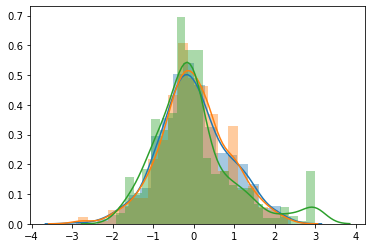

In [9]:
sns.distplot(lr.predict(data))
sns.distplot(nn.predict(data))
sns.distplot(target)

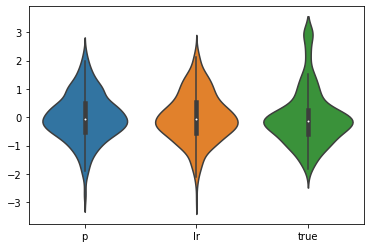

In [10]:
sns.violinplot(data=k)

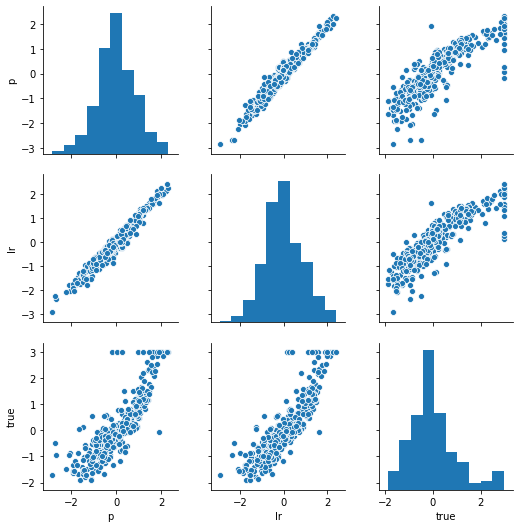

In [11]:
sns.pairplot(data=k)

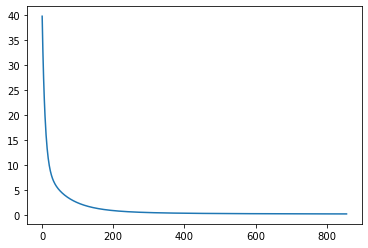

In [12]:
## 오차 그래프
sns.lineplot(data=np.array(nn.hist))

In [13]:
## 최종 오차 비교
print('lr:', (lr.predict(data) - target).T @ (lr.predict(data) - target) / len(target))
print('self:', nn.loss)

lr: [[0.25935734]]
self: 0.2925450263458831


In [14]:
## 복합 기능 미구현


# # breast cancer
# from sklearn.datasets import load_breast_cancer
# import pandas as pd 
# from sklearn.model_selection import train_test_split

# d = load_breast_cancer()

# data = pd.DataFrame(d.data, columns=d.feature_names)
# target = pd.DataFrame(d.target)

# train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=2019, shuffle=True)

In [15]:
# data = (data - np.mean(data)) / np.std(data)